In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [2]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org)) # integer features
y = np.dot(X_org, w) # continuous target
print(X[:5, 0], '\n')
print('Number of feature appearances: ', np.bincount(X[:, 0]))

[56 81 25 20 27] 

Number of feature appearances:  [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0, 0.5, 'Number of appearances')

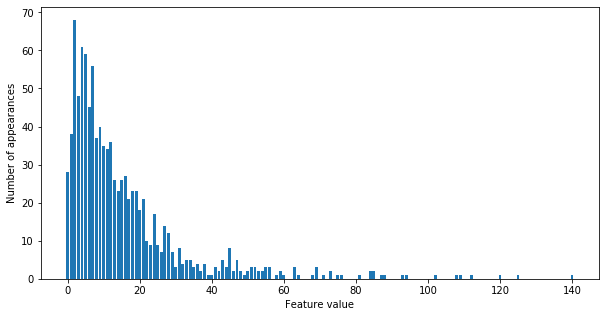

In [3]:
# Distribution of the first feature (~Poisson)

bins = np.bincount(X[:, 0])
plt.figure(figsize=(10, 5))
plt.bar(range(len(bins)), bins)
plt.xlabel('Feature value')
plt.ylabel('Number of appearances')

In [5]:
# Fit Linear Model to data drawn from Poisson distribution

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
ridge = Ridge()
ridge.fit(X_train, y_train)
print('Test score: {:.3f}'.format(ridge.score(X_test, y_test)))
# Low score - can't capture X and y relationship

Test score: 0.612


In [6]:
# Apply log transformation

for feature, i in zip(['1st', '2nd', '3rd'], [0, 1, 2]):
    print('No. of zeros in {} feature: {}'.format(feature, len(X[X[:, i] == 0])))
    
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

No. of zeros in 1st feature: 28
No. of zeros in 2nd feature: 17
No. of zeros in 3rd feature: 15


Text(0, 0.5, 'Number of appearances')

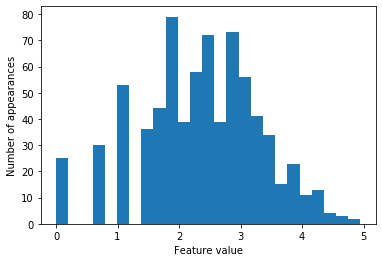

In [7]:
# Distribution of the first feature after log transform

plt.hist(X_train_log[:, 0], bins=25)
plt.xlabel('Feature value')
plt.ylabel('Number of appearances')

In [8]:
# Fit Ridge model on transformed data

score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print('Test score: {:.3f}'.format(score))

Test score: 0.881
